In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
###Prepare the data

In [3]:
whale_returns = pd.read_csv("whale_returns.csv", index_col="Date", infer_datetime_format=True,parse_dates=True)
algo_returns = pd.read_csv("algo_returns.csv" , index_col="Date", infer_datetime_format=True,parse_dates=True)
sp500_history = pd.read_csv("sp500_history.csv", index_col="Date", infer_datetime_format=True,parse_dates=True)

In [4]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
whale_returns.sort_index(ascending=True,inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
whale_returns.dropna(inplace=True)

In [7]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [8]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
algo_returns.sort_index(ascending=True,inplace=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [10]:
algo_returns.dropna(inplace=True)

In [11]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [12]:
sp500_history.head()

,Close
Date,
2019-04-23,"$2,933.68"
2019-04-22,"$2,907.97"
2019-04-18,"$2,905.03"
2019-04-17,"$2,900.45"
2019-04-16,"$2,907.06"


In [13]:
sp500_history.sort_index(ascending=True,inplace=True)
sp500_history

,Close
Date,
2012-10-01,"$1,444.49"
2012-10-02,"$1,445.75"
2012-10-03,"$1,450.99"
2012-10-04,"$1,461.40"
2012-10-05,"$1,460.93"
...,...
2019-04-16,"$2,907.06"
2019-04-17,"$2,900.45"
2019-04-18,"$2,905.03"


In [14]:
sp500_history.dtypes

Close    object
dtype: object

In [15]:
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').str.replace(',','')
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [16]:
sp500_history["Close"] = sp500_history["Close"].astype(object).astype(float)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [17]:
sp500_history.dtypes

Close    float64
dtype: object

In [18]:
sp500_history_daily=sp500_history.pct_change()
sp500_history_daily

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [19]:
sp500_history_daily.dropna(inplace=True)

In [20]:
sp500_history_daily.isnull().sum()

Close    0
dtype: int64

In [21]:
columns = ["sp500_daily_returns"]
sp500_history_daily.columns = columns
sp500_history_daily.head()

,sp500_daily_returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [22]:
combined_portfolios = pd.concat([whale_returns,algo_returns,sp500_history_daily], axis="columns", join="inner")
combined_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_daily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [23]:
###Conduct quantitative analysis

<AxesSubplot:xlabel='Date'>

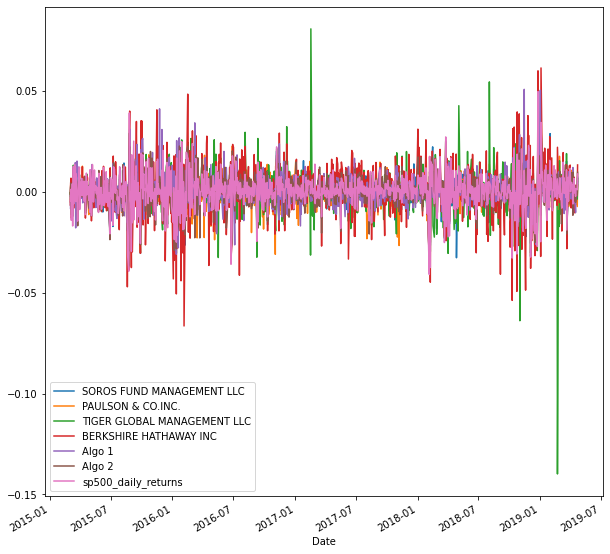

In [24]:
combined_portfolios.plot(figsize=(10,10))

In [25]:
combined_cum=combined_portfolios.sum()
combined_cum_df=combined_cum.to_frame()

In [26]:
columns = ["combined_cum_daily_returns"]
combined_cum_df.columns = columns
combined_cum_df

,combined_cum_daily_returns
SOROS FUND MANAGEMENT LLC,0.184891
PAULSON & CO.INC.,-0.223136
TIGER GLOBAL MANAGEMENT LLC,-0.086650
BERKSHIRE HATHAWAY INC,0.527786
Algo 1,0.690246
Algo 2,0.274803
sp500_daily_returns,0.364329


<AxesSubplot:>

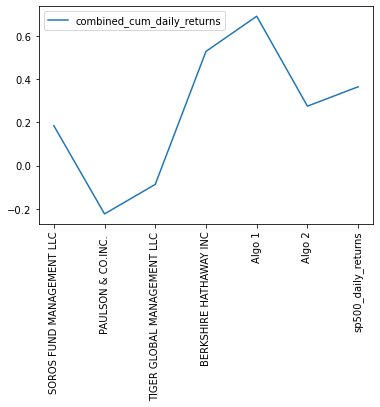

In [27]:
combined_cum_df.plot(rot=90)

<AxesSubplot:>

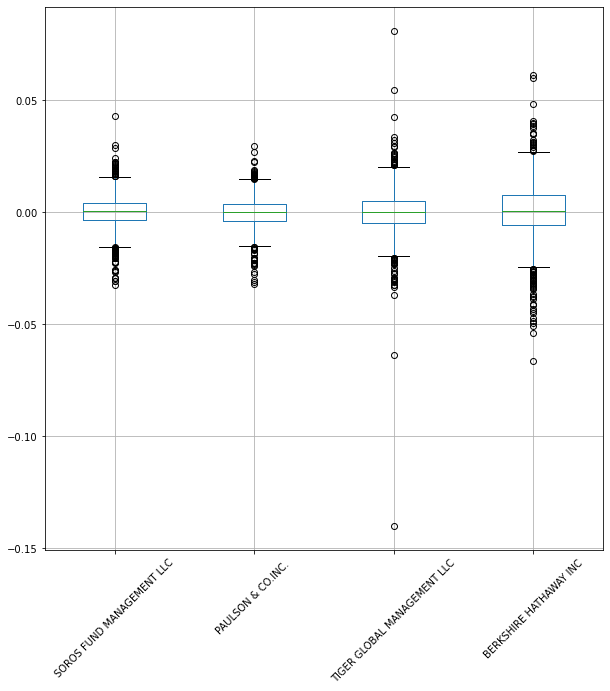

In [28]:
whale_returns.boxplot(rot=45,figsize=(10,10))

<AxesSubplot:>

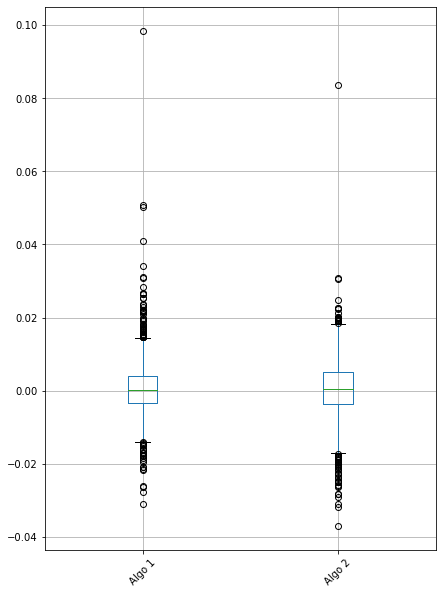

In [29]:
algo_returns.boxplot(rot=45,figsize=(7,10))

<AxesSubplot:>

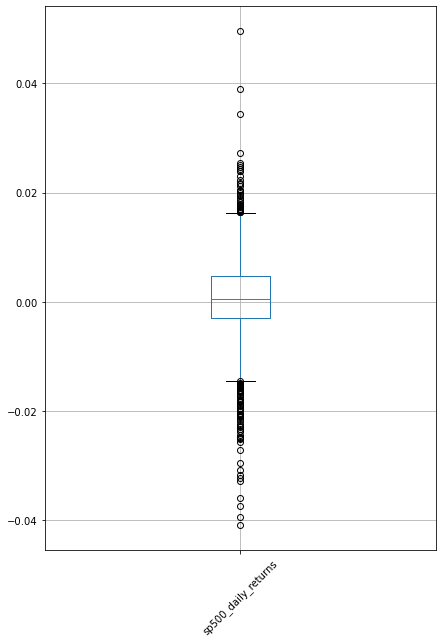

In [30]:
sp500_history_daily.boxplot(rot=45,figsize=(7,10))

<AxesSubplot:>

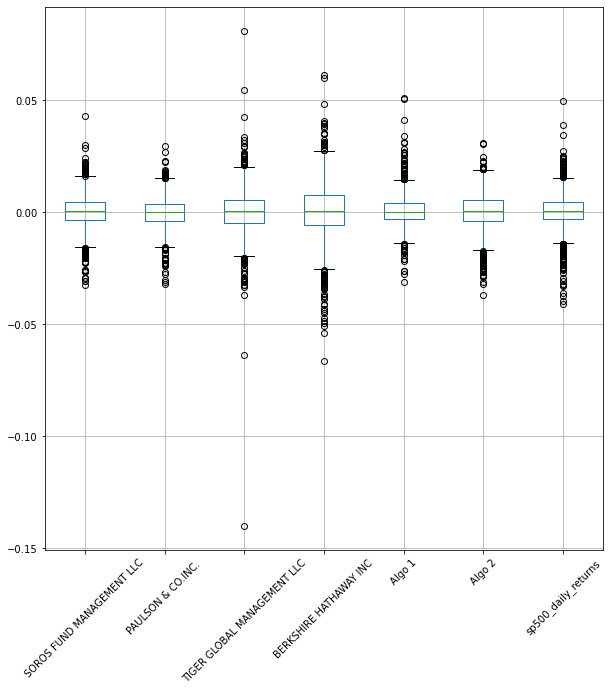

In [31]:
combined_portfolios.boxplot(rot=45,figsize=(10,10))

In [32]:
combined_portfolios_std=combined_portfolios.std()
combined_portfolios_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500_daily_returns            0.008554
dtype: float64

In [33]:
for key,value in combined_portfolios_std.items():
    if value > combined_portfolios_std[6]:
        print(f"These portolfio are riskiser than sp500 portfolio {key}")

These portolfio are riskiser than sp500 portfolio TIGER GLOBAL MANAGEMENT LLC
These portolfio are riskiser than sp500 portfolio BERKSHIRE HATHAWAY INC


In [34]:
combined_portfolios_std_annualized = combined_portfolios_std * np.sqrt(252) 
combined_portfolios_std_annualized

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500_daily_returns            0.135786
dtype: float64

In [35]:
###Rolling statistics

<AxesSubplot:xlabel='Date'>

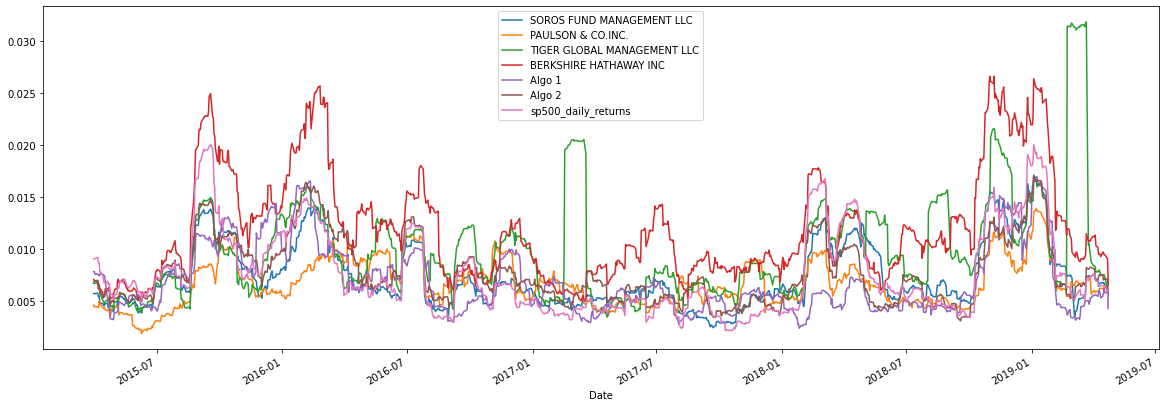

In [36]:
combined_portfolios.rolling(21).std().plot(figsize=(20,7))

<AxesSubplot:xlabel='Date'>

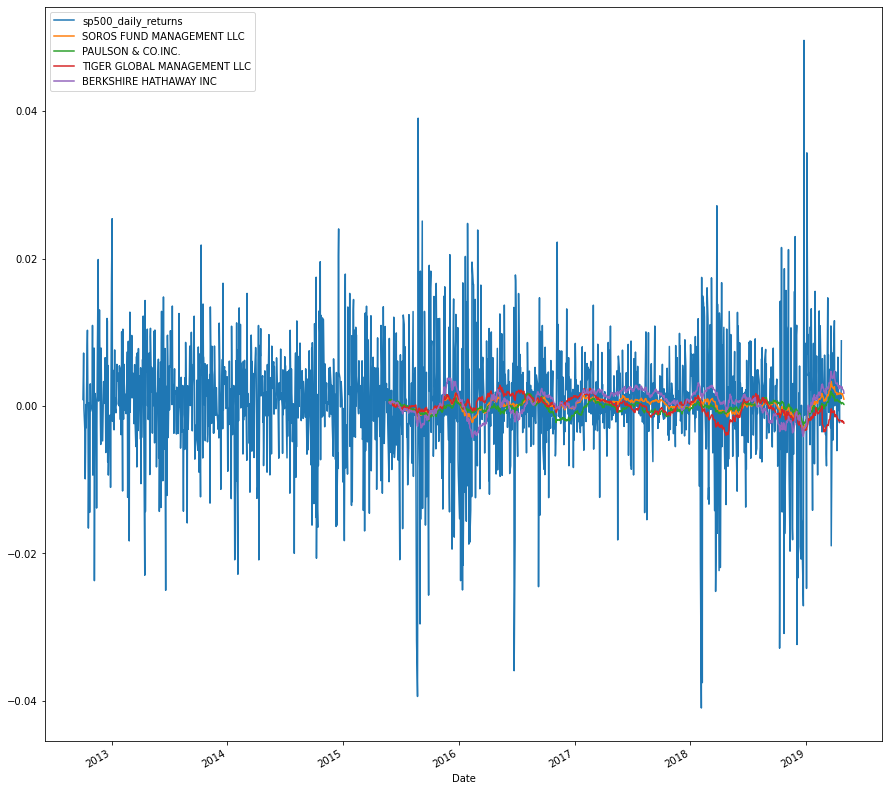

In [37]:
ax=sp500_history_daily.plot()
whale_returns.rolling(window=60).mean().plot(ax=ax, figsize=(15,15))

In [38]:
###Rolling statistics challenge

In [39]:
combined_portfolios.ewm(span=21).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_daily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000565,-0.000674,-0.001563,-0.000921,-0.005424,0.000813,-0.004460
2015-03-05,0.001827,0.001063,-0.000131,0.001874,-0.003790,0.002096,-0.002392
2015-03-06,-0.000964,-0.000267,-0.002526,-0.002420,-0.004125,-0.001791,-0.005771
2015-03-09,-0.000593,0.000810,-0.000519,-0.002236,-0.004442,-0.001049,-0.003441
...,...,...,...,...,...,...,...
2019-04-16,0.002021,0.000516,0.000721,0.001277,0.000012,0.001271,0.001544
2019-04-17,0.001574,-0.000119,0.000255,0.001454,-0.000926,0.000680,0.001197
2019-04-18,0.001563,0.000003,0.000285,0.001496,-0.000895,0.000507,0.001232


<AxesSubplot:xlabel='Date'>

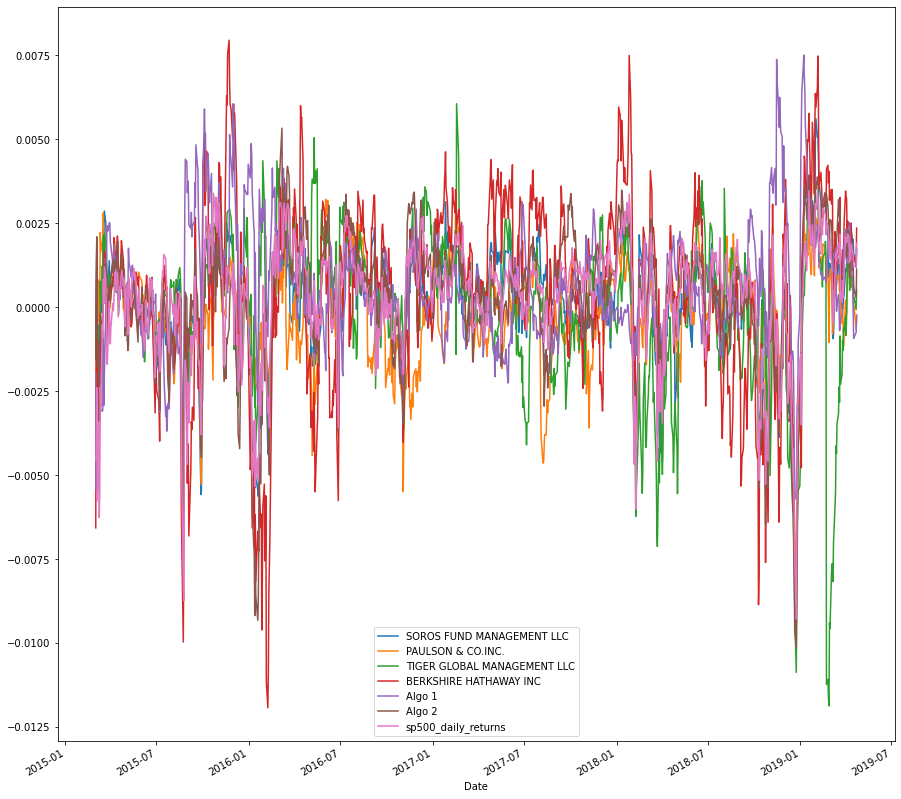

In [40]:
combined_portfolios.ewm(span=21).mean().plot(figsize=(15,15))

In [41]:
###Sharpe Ratios

In [42]:
correlation = combined_portfolios.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_daily_returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500_daily_returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [43]:
correlation.sum(axis=0).sort_values()

Algo 1                         2.614209
TIGER GLOBAL MANAGEMENT LLC    3.715893
PAULSON & CO.INC.              4.296740
BERKSHIRE HATHAWAY INC         4.455893
Algo 2                         4.847528
SOROS FUND MANAGEMENT LLC      5.001465
sp500_daily_returns            5.021171
dtype: float64

In [44]:
sharp_ratios = (correlation.mean()*252) / (correlation.std() * np.sqrt(252))
sharp_ratios

SOROS FUND MANAGEMENT LLC      51.651706
PAULSON & CO.INC.              42.217107
TIGER GLOBAL MANAGEMENT LLC    33.260272
BERKSHIRE HATHAWAY INC         42.843774
Algo 1                         21.122406
Algo 2                         46.305818
sp500_daily_returns            49.440002
dtype: float64

<AxesSubplot:>

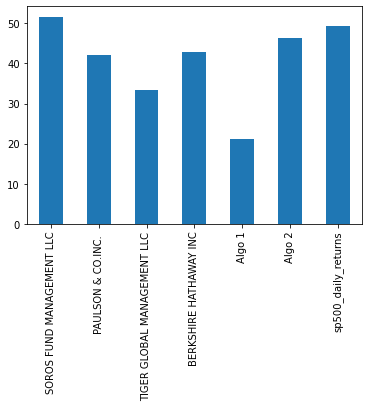

In [45]:
sharp_ratios.plot.bar()

In [46]:
print("soros fund management is best return:risk portfolio, followed by Ssp500, then Algo2")

soros fund management is best return:risk portfolio, followed by Ssp500, then Algo2


In [47]:
###Create a custom portfolio 

In [48]:
googl = pd.read_csv("goog_historical.csv")
aapl = pd.read_csv("aapl_historical.csv")
cost = pd.read_csv("cost_historical.csv")

In [49]:
googl_df=googl.sort_values('Trade DATE')
googl_df

,Symbol,Trade DATE,NOCP
82,GOOG,1/10/2019,1070.33
81,GOOG,1/11/2019,1057.19
80,GOOG,1/14/2019,1044.69
79,GOOG,1/15/2019,1077.15
78,GOOG,1/16/2019,1080.97
...,...,...,...
152,GOOG,9/28/2018,1193.47
170,GOOG,9/4/2018,1197.00
169,GOOG,9/5/2018,1186.48
168,GOOG,9/6/2018,1171.44


In [50]:
aapl_df=aapl.sort_values('Trade DATE')
aapl_df

,Symbol,Trade DATE,NOCP
82,AAPL,1/10/2019,153.80
81,AAPL,1/11/2019,152.29
80,AAPL,1/14/2019,150.00
79,AAPL,1/15/2019,153.07
78,AAPL,1/16/2019,154.94
...,...,...,...
152,AAPL,9/28/2018,225.74
170,AAPL,9/4/2018,228.36
169,AAPL,9/5/2018,226.87
168,AAPL,9/6/2018,223.10


In [51]:
cost_df=cost.sort_values('Trade DATE')
cost_df

,Symbol,Trade DATE,NOCP
82,COST,1/10/2019,210.64
81,COST,1/11/2019,210.51
80,COST,1/14/2019,209.00
79,COST,1/15/2019,211.03
78,COST,1/16/2019,210.18
...,...,...,...
152,COST,9/28/2018,234.88
170,COST,9/4/2018,234.68
169,COST,9/5/2018,235.61
168,COST,9/6/2018,236.68


In [52]:
combined_stocks=pd.concat([googl_df,aapl_df,cost_df], axis="columns", join="inner")
combined_stocks

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
82,GOOG,1/10/2019,1070.33,AAPL,1/10/2019,153.80,COST,1/10/2019,210.64
81,GOOG,1/11/2019,1057.19,AAPL,1/11/2019,152.29,COST,1/11/2019,210.51
80,GOOG,1/14/2019,1044.69,AAPL,1/14/2019,150.00,COST,1/14/2019,209.00
79,GOOG,1/15/2019,1077.15,AAPL,1/15/2019,153.07,COST,1/15/2019,211.03
78,GOOG,1/16/2019,1080.97,AAPL,1/16/2019,154.94,COST,1/16/2019,210.18
...,...,...,...,...,...,...,...,...,...
152,GOOG,9/28/2018,1193.47,AAPL,9/28/2018,225.74,COST,9/28/2018,234.88
170,GOOG,9/4/2018,1197.00,AAPL,9/4/2018,228.36,COST,9/4/2018,234.68
169,GOOG,9/5/2018,1186.48,AAPL,9/5/2018,226.87,COST,9/5/2018,235.61
168,GOOG,9/6/2018,1171.44,AAPL,9/6/2018,223.10,COST,9/6/2018,236.68


In [53]:
combined_stocks.columns=['Symbol1', 'DATE', 'googl_NOCP', 'Symbol2', 'Trade_DATE2', 'aapl NOCP','Symbol3', 'Trade DATE3', 'cost_NOCP']

In [54]:
combined_stocks

,Symbol1,DATE,googl_NOCP,Symbol2,Trade_DATE2,aapl NOCP,Symbol3,Trade DATE3,cost_NOCP
82,GOOG,1/10/2019,1070.33,AAPL,1/10/2019,153.80,COST,1/10/2019,210.64
81,GOOG,1/11/2019,1057.19,AAPL,1/11/2019,152.29,COST,1/11/2019,210.51
80,GOOG,1/14/2019,1044.69,AAPL,1/14/2019,150.00,COST,1/14/2019,209.00
79,GOOG,1/15/2019,1077.15,AAPL,1/15/2019,153.07,COST,1/15/2019,211.03
78,GOOG,1/16/2019,1080.97,AAPL,1/16/2019,154.94,COST,1/16/2019,210.18
...,...,...,...,...,...,...,...,...,...
152,GOOG,9/28/2018,1193.47,AAPL,9/28/2018,225.74,COST,9/28/2018,234.88
170,GOOG,9/4/2018,1197.00,AAPL,9/4/2018,228.36,COST,9/4/2018,234.68
169,GOOG,9/5/2018,1186.48,AAPL,9/5/2018,226.87,COST,9/5/2018,235.61
168,GOOG,9/6/2018,1171.44,AAPL,9/6/2018,223.10,COST,9/6/2018,236.68


In [55]:
combined_stocks_df=combined_stocks.drop(['Symbol1', 'Symbol2', 'Trade_DATE2', 'Symbol3', 'Trade DATE3'], axis=1)
combined_stocks_df

,DATE,googl_NOCP,aapl NOCP,cost_NOCP
82,1/10/2019,1070.33,153.80,210.64
81,1/11/2019,1057.19,152.29,210.51
80,1/14/2019,1044.69,150.00,209.00
79,1/15/2019,1077.15,153.07,211.03
78,1/16/2019,1080.97,154.94,210.18
...,...,...,...,...
152,9/28/2018,1193.47,225.74,234.88
170,9/4/2018,1197.00,228.36,234.68
169,9/5/2018,1186.48,226.87,235.61
168,9/6/2018,1171.44,223.10,236.68


In [56]:
combined_stocks_df.set_index('DATE', inplace=True)

In [57]:
combined_stocks_df

,googl_NOCP,aapl NOCP,cost_NOCP
DATE,,,
1/10/2019,1070.33,153.80,210.64
1/11/2019,1057.19,152.29,210.51
1/14/2019,1044.69,150.00,209.00
1/15/2019,1077.15,153.07,211.03
1/16/2019,1080.97,154.94,210.18
...,...,...,...
9/28/2018,1193.47,225.74,234.88
9/4/2018,1197.00,228.36,234.68
9/5/2018,1186.48,226.87,235.61


In [58]:
stocks_daily_returns = combined_stocks_df.pct_change()
stocks_daily_returns

,googl_NOCP,aapl NOCP,cost_NOCP
DATE,,,
1/10/2019,NaN,NaN,NaN
1/11/2019,-0.012277,-0.009818,-0.000617
1/14/2019,-0.011824,-0.015037,-0.007173
1/15/2019,0.031071,0.020467,0.009713
1/16/2019,0.003546,0.012217,-0.004028
...,...,...,...
9/28/2018,-0.000979,0.003512,0.003761
9/4/2018,0.002958,0.011606,-0.000851
9/5/2018,-0.008789,-0.006525,0.003963


In [59]:
stocks_std =stocks_daily_returns.std()
stocks_std

googl_NOCP    0.033842
aapl NOCP     0.051430
cost_NOCP     0.044341
dtype: float64

In [60]:
stock_annualized_std = stocks_std * np.sqrt(252) 
stock_annualized_std

googl_NOCP    0.537231
aapl NOCP     0.816421
cost_NOCP     0.703888
dtype: float64

<AxesSubplot:xlabel='DATE'>

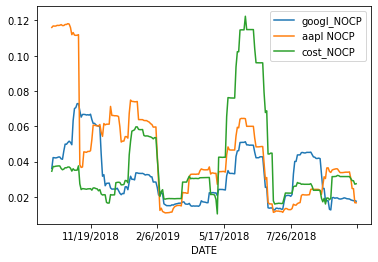

In [61]:
stocks_daily_returns.rolling(window=21).std().plot()

<AxesSubplot:>

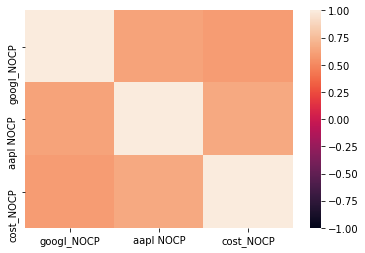

In [62]:
import seaborn as sns
price_correlation = stocks_daily_returns.corr()
sns.heatmap(price_correlation, vmin=-1, vmax=1)

In [63]:
covariance = stocks_daily_returns.cov()

In [64]:
variance = stocks_daily_returns.var()

In [65]:
combined_stocks_beta = covariance / variance
combined_stocks_beta

,googl_NOCP,aapl NOCP,cost_NOCP
googl_NOCP,1.000000,0.411737,0.458683
aapl NOCP,0.950881,1.000000,0.769929
cost_NOCP,0.787402,0.572307,1.000000


In [66]:
correlation_stocks = stocks_daily_returns.corr()
correlation_stocks

,googl_NOCP,aapl NOCP,cost_NOCP
googl_NOCP,1.000000,0.625710,0.600972
aapl NOCP,0.625710,1.000000,0.663804
cost_NOCP,0.600972,0.663804,1.000000


In [67]:
correlation_stocks.sum(axis=0).sort_values()

googl_NOCP    2.226683
cost_NOCP     2.264777
aapl NOCP     2.289515
dtype: float64

In [68]:
sharp_ratios_stocks = (correlation_stocks.mean()*252) / (correlation_stocks.std() * np.sqrt(252))
sharp_ratios_stocks

googl_NOCP    52.699267
aapl NOCP     58.815695
cost_NOCP     55.855943
dtype: float64

<AxesSubplot:>

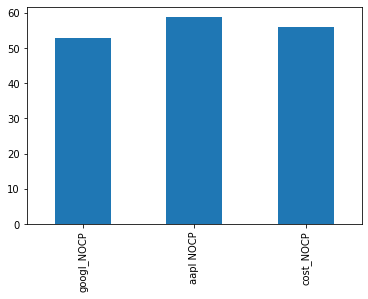

In [69]:
sharp_ratios_stocks.plot.bar()

<AxesSubplot:>

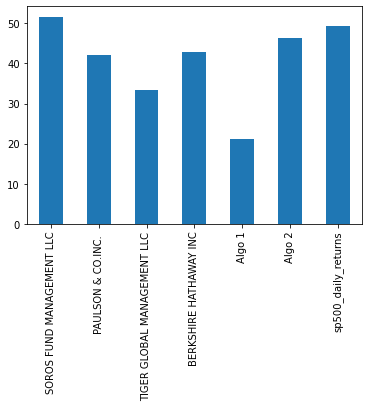

In [70]:
sharp_ratios.plot.bar()

In [72]:
### Based on the two both bar graphs above, 3-stock portfolio does better than the whale portfolios